<font size="10"> Credit Card Fraud Detection Data Pre-processing and Modelling </font>

# Data pre processing and modelling components  

1  __Classification Models__

- Logistic Regression
- XG Boost
- SVM 's
- Decision Trees

2  __Class Imbalance Solutions__

- Under Sampling
- Over Sampling
- SMOTE

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- ROC_AUC
- F1 Score

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating datafreame with the previous csv (EDA)
df = pd.read_csv('data/elementary_data_processed.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,hour,day,amount_scaled,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.000000,0.338455,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.000000,-0.419376,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.000012,1.519791,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.000012,0.203735,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.000023,-0.072258,4.248495


# Machine Learning Step 1

In [3]:
y = df['Class'].values
X = df.drop(columns = ['Time','amount_scaled','hour','Class','amount_log','day'])

# Setting the Baseline

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))

0.9991532599491956


In [5]:
pd.Series(y_pred).value_counts()

0    84938
1       94
dtype: int64

In [6]:
pd.Series(y_test).value_counts()

0    84890
1      142
dtype: int64

In [7]:
94/142

0.6619718309859155

# Class Imbalance ! 

In [8]:
cnf_matrix = confusion_matrix(y_test , y_pred)
cnf_matrix

array([[84878,    12],
       [   60,    82]], dtype=int64)

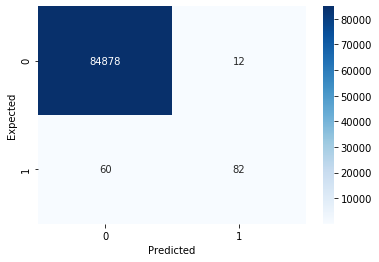

In [9]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Confusion Matrix
A confusion matrix is defined into four parts : __{ TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted)__
Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative <br>
__P__ redicted - __R__ ows and __A__ ctual as __C__ olumns <br>

## __Accuracy , Precision and Recall__
#### __Accuracy__ - > The most used and classic classification metric : Suited for binary classification problems.
Accuracy = ( TP + TN ) / (TP + TN + FP + FN )
Basically Rightly predicted results amongst all the results , used when the classes are balanced
#### __Precision__ - > What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !
Precision = ( TP ) / ( TP + FP )
#### __Recall__ - > What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible
Recall = TP / ( TP + FN )
## F1 Score
## Harmonic mean of Precision and Recall 
### F1 = 2*(precision * recall) / (precision + recall )
It basically maintains a balance between the precision and recall for your classifier

In [10]:
(82-12)/142

0.49295774647887325

# What is an ROC_AUC Curve ?
It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class. 
### __Sensitivity__ 
The sensitivity of a model is defined by the proportion of actual positives that are classified as Psitives , i.e = TP / ( TP + FN )
### __Specificity__
The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )
As we can see that both are i`ndependent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.
# ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. 
It depicts if a model can clearly identify each class or not
Higher the area under the curve , better the model and it's ability to seperate the positive and negative class

In [11]:
roc_auc_score(y_test , y_pred)

0.788661714663052

In [12]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99551037e-01, 4.48963019e-04],
       [9.99761415e-01, 2.38584709e-04],
       [9.99685341e-01, 3.14658872e-04],
       ...,
       [9.99817658e-01, 1.82341523e-04],
       [9.99654984e-01, 3.45015901e-04],
       [9.99701523e-01, 2.98477403e-04]])

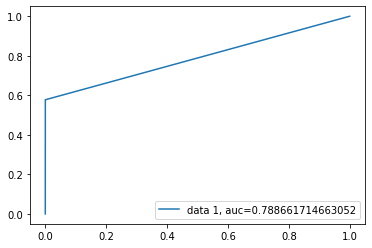

In [13]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Fixing class Imbalance and appling some sampling techniques

# UnderSampling

In [14]:
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 282964, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))  

0.9366197183098591


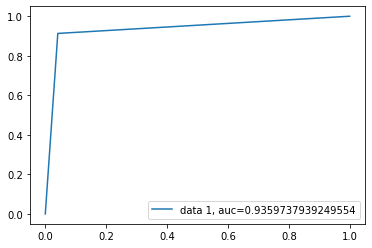

In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# OverSampling

In [17]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 282964, 1: 473})
Resampled dataset shape Counter({0: 282964, 1: 282964})


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))  

0.9480383321847814


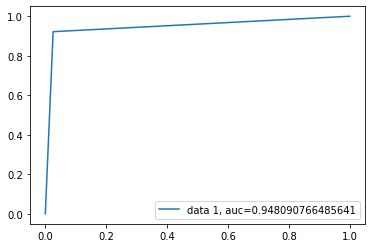

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE Sampling

In [20]:
print('Original dataset shape %s' % Counter(y))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 282964, 1: 473})
Resampled dataset shape Counter({0: 282964, 1: 282964})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))  

0.9567025368272872


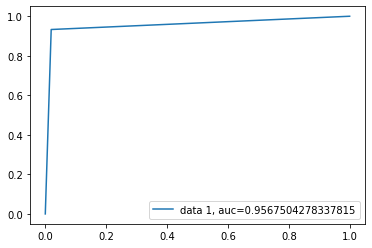

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# ADASYN

In [23]:
print('Original dataset shape %s' % Counter(y))
rus = ADASYN(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 282964, 1: 473})
Resampled dataset shape Counter({0: 282964, 1: 282900})


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred , y_test))

0.9164997643732328


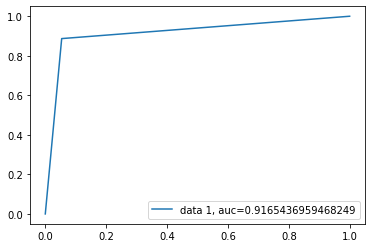

In [25]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Principal Component Analysis

In [26]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)
X_reduced_pca

array([[ -14.98028929,   -3.94230838],
       [-161.91016394,   -2.98573127],
       [ 214.05665477,   -5.65772205],
       ...,
       [-124.23374588,    2.47157869],
       [-123.97860905,    1.83149813],
       [-121.42556474,   -1.4726469 ]])

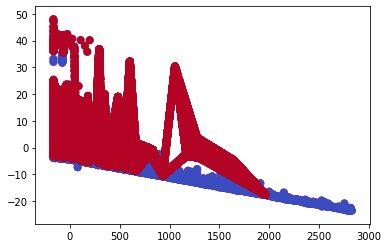

In [27]:
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

In [28]:
# Under sample data
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 473, 1: 473})


In [29]:
# Over sample data
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 282964, 1: 282964})


In [30]:
# SMOTE data
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 282964, 1: 282964})


# Applying different models

__Decision Tree Classifier__

0.9991179791137454


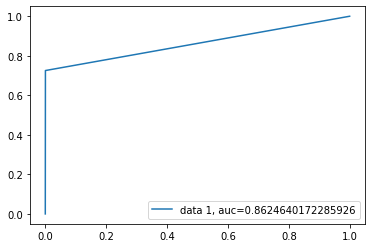

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )
y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

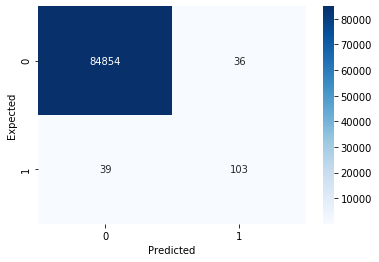

In [32]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* Undersampled data with Decision Tree Classifiers

0.8838028169014085


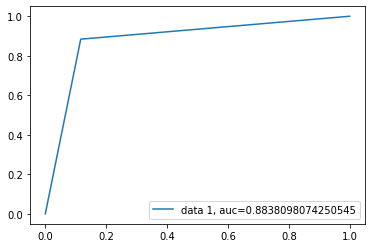

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)
y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

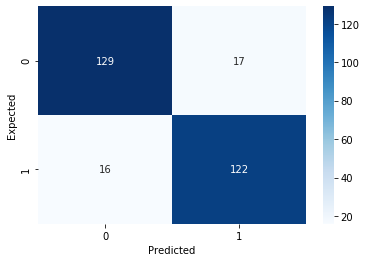

In [34]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* Oversampled data with Decision Tree Classifiers

0.9997113895122482


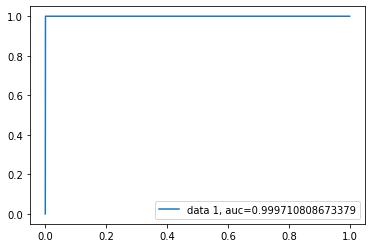

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)
y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

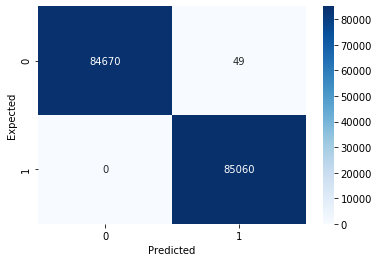

In [36]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* SMOTE data with Decision Tree Classifiers

0.9980150666454626


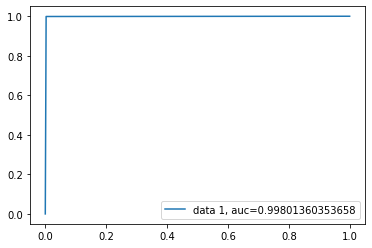

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)
y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

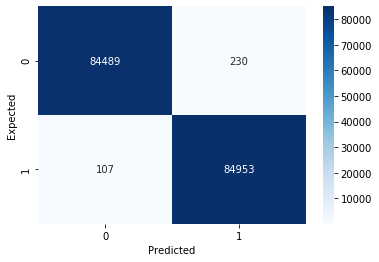

In [38]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Random Forest Classifier

0.9995295888606642


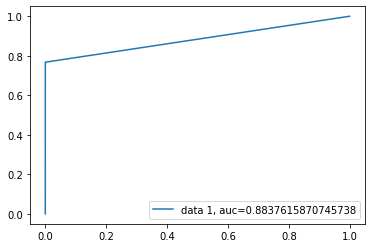

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

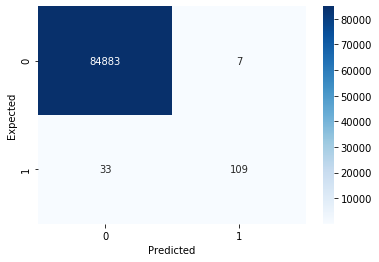

In [40]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* Undersampled Random Forest

0.9330985915492958


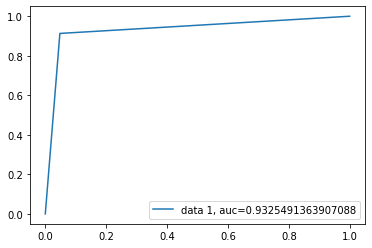

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

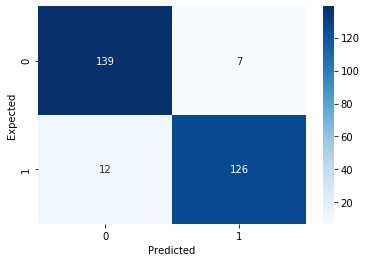

In [42]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* Oversampled Random Forest

0.9999410999004589


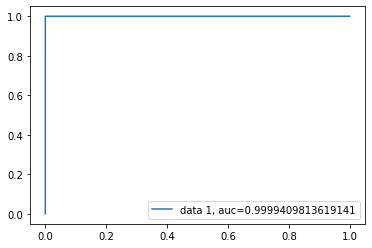

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

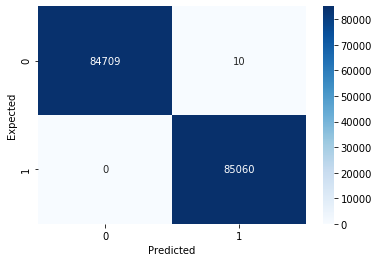

In [45]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

* SMOTE Random Forest

0.9998704197810094


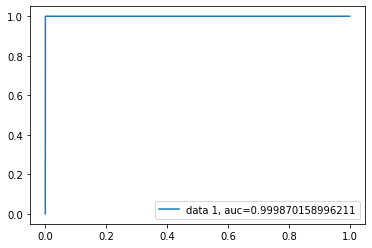

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

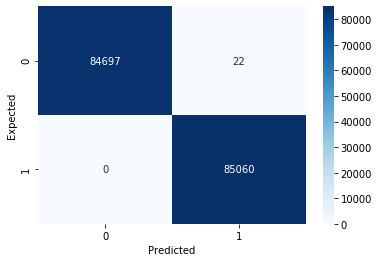

In [47]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# RandomForest with OverSampling data is the Best (99.99% Accuracy)

In [ ]:
# GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc_params = {'n_estimators':[100,200] , 'criterion':['gini','entropy']}
grid_knears = GridSearchCV(RandomForestClassifier(), rfc_params) 
grid_knears.fit(X_train, y_train)
grid_knears.best_estimator_
grid_knears

0.999946989910413


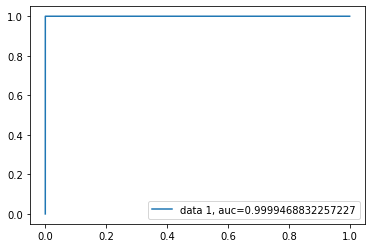

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(n_estimators = 100 , criterion= 'entropy')
rfc.fit( X_train, y_train )
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred , y_test))
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Done